In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import yfinance as yf  
from scipy import stats
import quandl
import pandas as pd
from matplotlib.pyplot import figure
from scipy.stats import probplot
from scipy.stats import pearsonr
import seaborn as sns
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import statsmodels as sm1
from statsmodels.tsa.arima.model import ARIMA
import warnings

In [4]:
df = yf.download('AAPL', start = '2020-01-01', end='2021-12-31', progress=False, interval = '1wk').dropna()
df = df.loc[:, ['Adj Close']]
dfAdjClose = df['Adj Close']
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)
dfAdjClose

Date
2020-01-01     73.505638
2020-01-08     77.025848
2020-01-15     77.984116
2020-01-22     78.260025
2020-01-29     78.545769
                 ...    
2021-12-01    171.179993
2021-12-08    174.330002
2021-12-15    172.990005
2021-12-22    179.289993
2021-12-29    177.570007
Name: Adj Close, Length: 105, dtype: float64

In [5]:
df['simple_rtn'] = df.adj_close.pct_change()
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1)).dropna()
print(df)

             adj_close  simple_rtn   log_rtn
Date                                        
2020-01-01   73.505638         NaN       NaN
2020-01-08   77.025848    0.047890  0.046779
2020-01-15   77.984116    0.012441  0.012364
2020-01-22   78.260025    0.003538  0.003532
2020-01-29   78.545769    0.003651  0.003645
...                ...         ...       ...
2021-12-01  171.179993    0.035572  0.034954
2021-12-08  174.330002    0.018402  0.018234
2021-12-15  172.990005   -0.007687 -0.007716
2021-12-22  179.289993    0.036418  0.035771
2021-12-29  177.570007   -0.009593 -0.009640

[105 rows x 3 columns]


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Log returns (%)')]

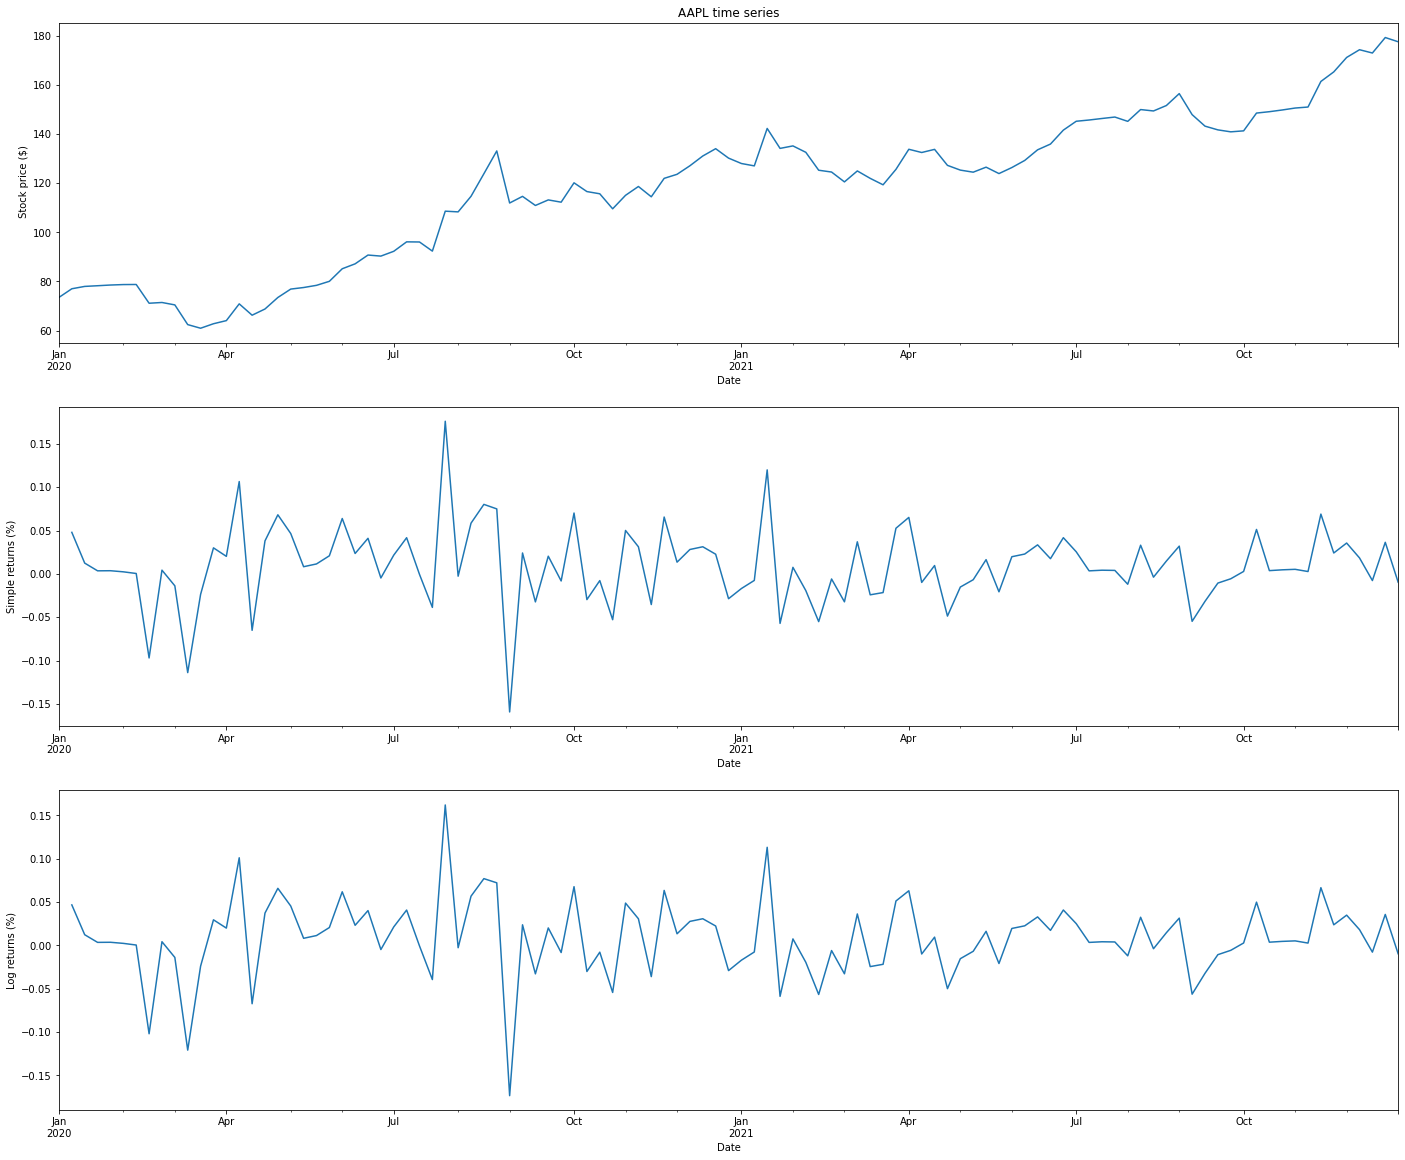

In [6]:
fig, ax = plt.subplots(3, 1, figsize=(24,20)) 
df.adj_close.plot(ax=ax[0])
ax[0].set(title = 'AAPL time series', ylabel = ' Stock price ($)')

df.simple_rtn.plot(ax=ax[1])
ax[1].set(ylabel = 'Simple returns (%)')

df.log_rtn.plot(ax = ax[2])
ax[2].set(xlabel = 'Date',
         ylabel = 'Log returns (%)')



In [7]:
r_range = np.linspace(min(df.log_rtn), max(df.log_rtn), num=100)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)

Text(0.5, 1.0, 'Q-Q plot')

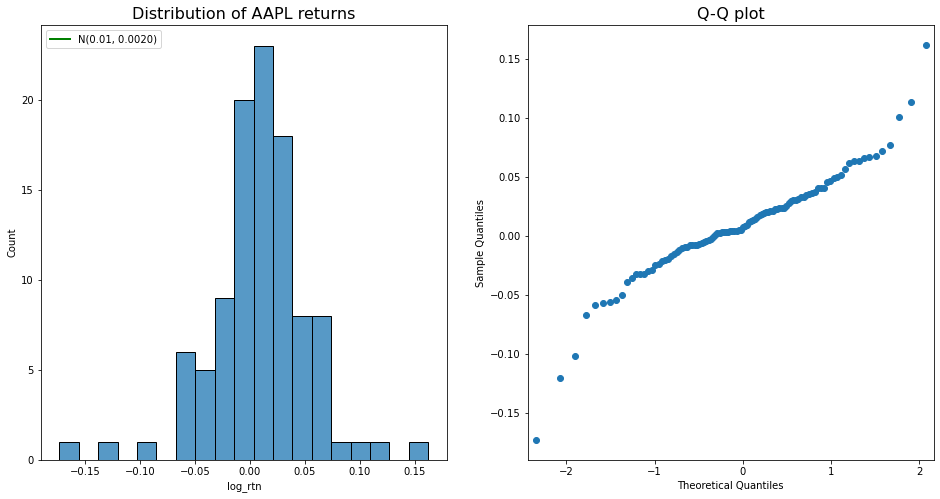

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))

#histogram
sns.histplot(df.log_rtn, kde=False, ax=ax[0])
ax[0].set_title('Distribution of AAPL returns', fontsize=16)
ax[0].plot(r_range, norm_pdf, 'g', lw=2, label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left');

#QQ plot
qq=sm.qqplot(df.log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize = 16)

In [9]:
jb_test = scs.jarque_bera(df.log_rtn.values)

print('---------- Descriptive Statistics ----------')
print('Range of dates:', min(df.index.date), '-', max(df.index.date))
print('Number of observations:', df.shape[0])
print(f'Mean: {df.log_rtn.mean():.4f}')
print(f'Median: {df.log_rtn.median():.4f}')
print(f'Min: {df.log_rtn.min():.4f}')
print(f'Max: {df.log_rtn.max():.4f}')
print(f'Standard Deviation: {df.log_rtn.std():.4f}')
print(f'Skewness: {df.log_rtn.skew():.4f}')
print(f'Kurtosis: {df.log_rtn.kurtosis():.4f}') 
print(f'Jarque-Bera statistic: {jb_test[0]:.2f} with p-value: {jb_test[1]:.2f}')

---------- Descriptive Statistics ----------
Range of dates: 2020-01-01 - 2021-12-29
Number of observations: 105
Mean: 0.0085
Median: 0.0064
Min: -0.1734
Max: 0.1621
Standard Deviation: 0.0445
Skewness: -0.4552
Kurtosis: 3.5769
Jarque-Bera statistic: nan with p-value: nan


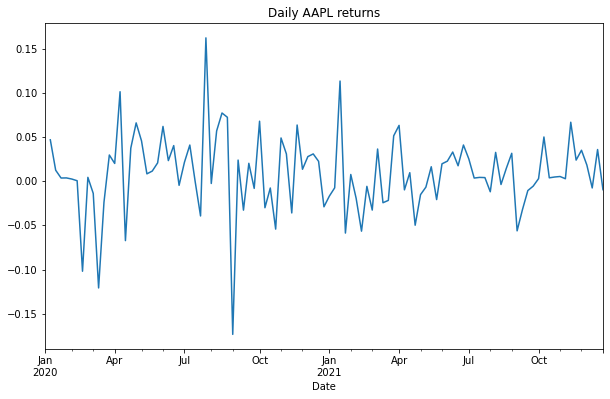

In [10]:
df.log_rtn.plot(title='Daily AAPL returns', figsize=(10, 6))

# plt.tight_layout()
# plt.savefig('images/ch1_im12.png')
plt.show()

In [11]:
# most prices are non-stationary this is due to the fact that stationary data is mean reverting and thus endless
# buy low and sell high and sell high and buy low opportunities are present
# this however is not the case.
# p-value greater than 0.05 thus the data is not stationary

result = adfuller(dfAdjClose.dropna())
print(f" ADF Statistic: {result[0]}")
print(f" p-value: {result[1]}")

 ADF Statistic: -0.33899321258313214
 p-value: 0.9197972908127701


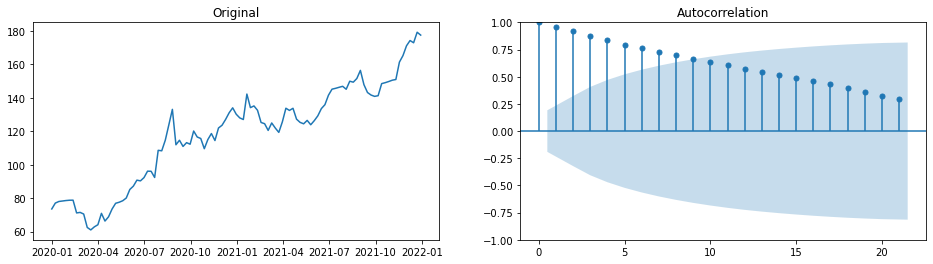

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(dfAdjClose)
ax1.set_title('Original')
plot_acf(dfAdjClose, ax=ax2);

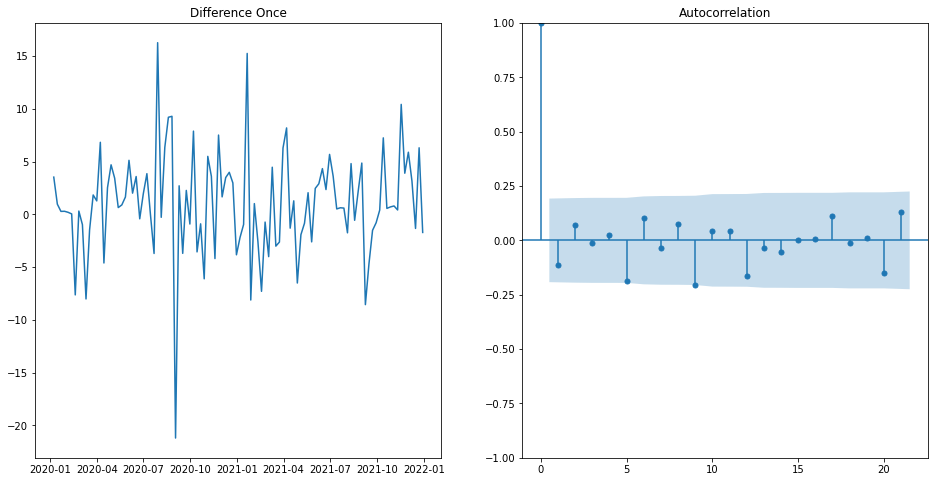

In [44]:
#this is for the q value for the MA term or the last term in ( , , )
diff = dfAdjClose.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.plot(diff)
ax1.set_title('Difference Once')
plot_acf(diff, ax=ax2);

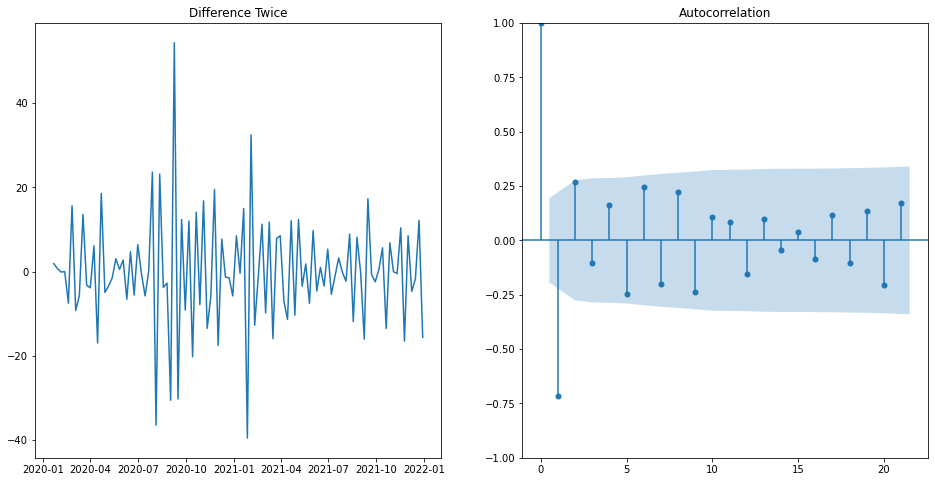

In [45]:
diff2 = dfAdjClose.diff().diff().diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.plot(diff2)
ax1.set_title('Difference Twice')
plot_acf(diff2, ax=ax2);

In [46]:
#p-value less than 0.05 means data is stationary

result = adfuller(diff)
print(f" ADF Statistic: {result[0]}")
print(f" p-value: {result[1]}")

 ADF Statistic: -11.248367469215404
 p-value: 1.7367018431916712e-20


C:\Users\Halis Karic\Ana\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


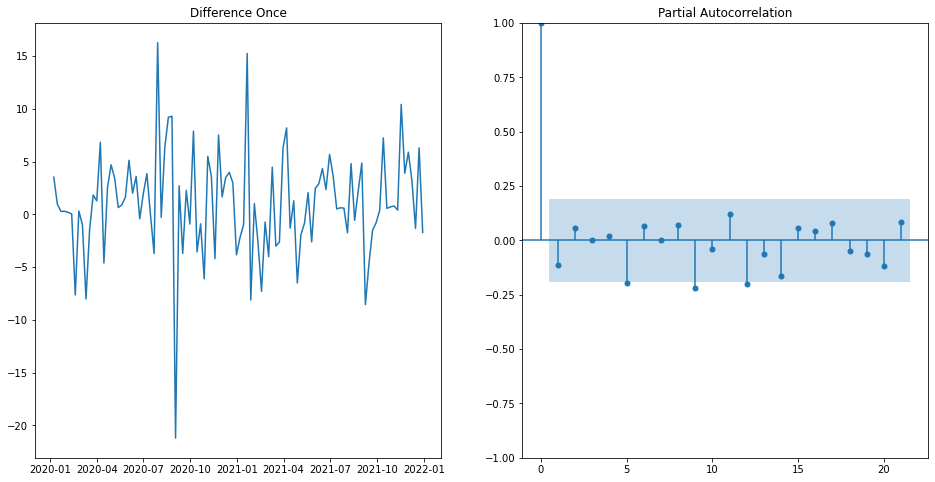

In [47]:
# this is the p term or the order of AR term or the first value in ( , , ) 1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

ax1.plot(diff)
ax1.set_title('Difference Once')
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

In [73]:
mod = sm.tsa.statespace.SARIMAX(diff, order=(9, 1, 9))
result = mod.fit(disp=False)

C:\Users\Halis Karic\Ana\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  warnings.warn('No frequency information was'
C:\Users\Halis Karic\Ana\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  warnings.warn('No frequency information was'
C:\Users\Halis Karic\Ana\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Halis Karic\Ana\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [74]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                  104
Model:               SARIMAX(9, 1, 9)   Log Likelihood                -302.754
Date:                Fri, 04 Feb 2022   AIC                            643.508
Time:                        19:16:58   BIC                            693.568
Sample:                    01-08-2020   HQIC                           663.784
                         - 12-29-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2662      0.243     -5.220      0.000      -1.742      -0.791
ar.L2         -0.9622      0.411     -2.342      0.019      -1.767      -0.157
ar.L3         -0.6783      0.448     -1.515      0.1

In [220]:
# Train test split

to_row = int(len(dfAdjClose)*0.8)

training_data = list(dfAdjClose[0:to_row])
testing_data = list(dfAdjClose[to_row:])


AttributeError: 'list' object has no attribute 'dropna'

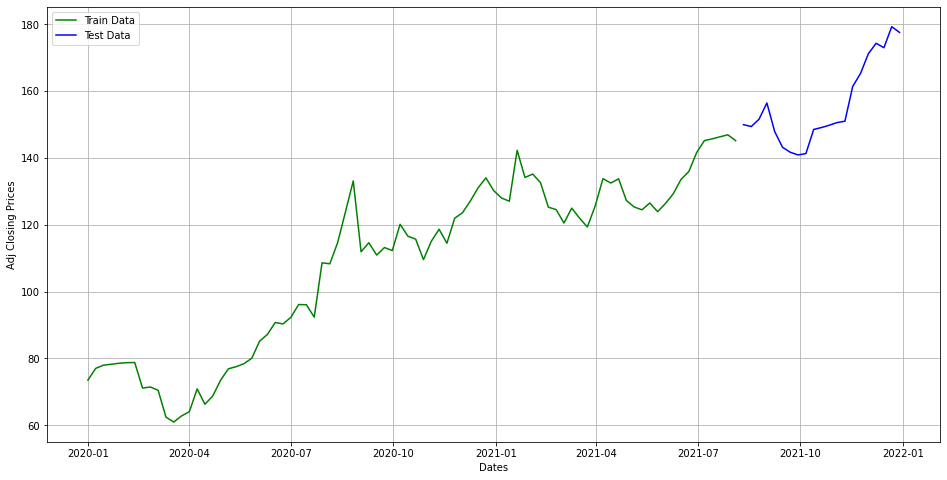

In [221]:
plt.figure(figsize=(16, 8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Adj Closing Prices')
plt.plot(dfAdjClose[0:to_row], 'green', label='Train Data')
plt.plot(dfAdjClose[to_row:], 'blue', label='Test Data')
plt.legend()

In [222]:
model_predictions = []
n_test_obser = len(testing_data)


In [223]:
for i in range(n_test_obser):
    model = ARIMA(training_data, order = (4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    print(output)
    break

[145.46259053]
